In [32]:
import tensorflow as tf
import pickle
from scipy.io import loadmat
import numpy as np
import scipy.io
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [34]:
snr = np.arange(1, 8)
mse_values = []

t_snr = 7  # Keep the fixed SNR for loading the model

for j in snr:
    dataset_path = './DNN_Dataset_{}.mat'.format(j)
    mat = loadmat(dataset_path)
    Dataset = mat['Preamble_Error_Correction_Dataset']
    Dataset = Dataset[0, 0]
    X = Dataset['X']
    Y = Dataset['Y']
    print('Loaded Dataset Inputs: ', X.shape)
    print('Loaded Dataset Outputs: ', Y.shape)

    # Normalizing Datasets
    scalerx = StandardScaler()
    scalerx.fit(X)
    scalery = StandardScaler()
    scalery.fit(Y)
    XS = scalerx.transform(X)
    YS = scalery.transform(Y)

    # Split Data into train and test sets
    seed = 7
    train_X, test_X, train_Y, test_Y = train_test_split(XS, YS, test_size=0.2, random_state=seed)
    print('Testing samples: ', test_X.shape[0])


    model_path = './LS_DNN_{}.h5'.format(t_snr)
    model = load_model(model_path, compile=False)


    # Testing the model
    Y_pred = model.predict(test_X)
    Original_Testing_X = scalerx.inverse_transform(test_X)
    Original_Testing_Y = scalery.inverse_transform(test_Y)
    Prediction_Y = scalery.inverse_transform(Y_pred)

    # Calculate MSE
    mse = mean_squared_error(Original_Testing_Y, Prediction_Y)
    mse_values.append(mse)
    print(f'MSE for SNR {j}: {mse}')

    # Save results
    result_path = './DNN_Results_{}.pickle'.format(j)
    with open(result_path, 'wb') as f:
        pickle.dump([Original_Testing_X, Original_Testing_Y, Prediction_Y], f)

    source_name = './DNN_Results_{}.pickle'.format(j)
    dest_name = './DNN_Results_{}.mat'.format(j)
    a = pickle.load(open(source_name, "rb"))
    scipy.io.savemat(dest_name, {
        'test_x_{}'.format(j): a[0],
        'test_y_{}'.format(j): a[1],
        'corrected_y_{}'.format(j): a[2]
    })
    print("Data successfully converted to .mat file ")
    os.remove(result_path)

Loaded Dataset Inputs:  (1000, 104)
Loaded Dataset Outputs:  (1000, 104)
Testing samples:  200
MSE for SNR 1: 0.03694717926799217
Data successfully converted to .mat file 
Loaded Dataset Inputs:  (1000, 104)
Loaded Dataset Outputs:  (1000, 104)
Testing samples:  200
MSE for SNR 2: 0.007833912248569228
Data successfully converted to .mat file 
Loaded Dataset Inputs:  (1000, 104)
Loaded Dataset Outputs:  (1000, 104)
Testing samples:  200
MSE for SNR 3: 0.0011755118136810513
Data successfully converted to .mat file 
Loaded Dataset Inputs:  (1000, 104)
Loaded Dataset Outputs:  (1000, 104)
Testing samples:  200
MSE for SNR 4: 0.0005022120384838704
Data successfully converted to .mat file 
Loaded Dataset Inputs:  (1000, 104)
Loaded Dataset Outputs:  (1000, 104)
Testing samples:  200
MSE for SNR 5: 0.00026786649859657344
Data successfully converted to .mat file 
Loaded Dataset Inputs:  (1000, 104)
Loaded Dataset Outputs:  (1000, 104)
Testing samples:  200
MSE for SNR 6: 0.0001815094786040803


In [35]:
Prediction_Y.shape

(200, 104)

In [36]:
Original_Testing_Y.shape

(200, 104)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 104)               10920     
_________________________________________________________________
dense_1 (Dense)              (None, 104)               10920     
_________________________________________________________________
dense_2 (Dense)              (None, 104)               10920     
Total params: 32,760
Trainable params: 32,760
Non-trainable params: 0
_________________________________________________________________


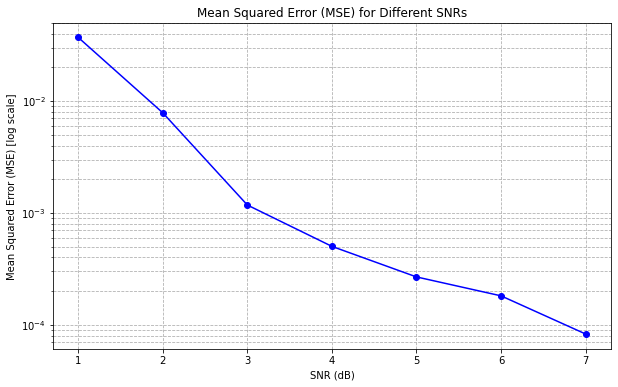

In [38]:
import matplotlib.pyplot as plt
# Plotting MSE values for different SNR on a logarithmic scale
plt.figure(figsize=(10, 6))
plt.plot(snr, mse_values, marker='o', linestyle='-', color='b')
plt.title('Mean Squared Error (MSE) for Different SNRs')
plt.xlabel('SNR (dB)')
plt.ylabel('Mean Squared Error (MSE) [log scale]')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(snr)  # Set x-ticks to match the SNR values
plt.grid(True, which="both", ls="--")  # Show grid lines for both major and minor ticks
plt.show()